In [1]:
# import libraries 
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [69]:
complete = pd.read_csv('bangsamoro_complete.csv').rename(columns={'Bgy_Code':'PSGC_code'})
complete.head(1)

,PSGC_code,Number of Health Facility,Occurence of Armed Conflict,Household with Concrete Walls Proportion,Access to Electricity Proportion,Access to Treated Water Proportion,Owned House and Lot Proportion,Has Copy Birth Certificate Proportion 6 - 24 yo,Married Proportion 6 - 24 yo,School Attendance after Grade 3 (6 - 24 yo),Overseas Worker in Family Proportion,Distance to nearest health facility,Percentage of working 15 - 19 yo,Number of High Schools,Number of Elementary Schools and Below
0,124702010,1,1,0.297401,0.425552,0.003842,0.958694,0.749897,0.151403,0.617923,0.133525,0.944123,0.0,0,0


In [60]:
shp_file = gpd.read_file('Barangays.shp')[['Bgy_Code','Mun_Code', 'Mun_Name']].rename(columns={'Bgy_Code':'PSGC_code'}).dropna(subset=['PSGC_code', 'Mun_Name'])

In [61]:
shp_file['PSGC_code']=shp_file.apply(lambda x: int(x.PSGC_code[2:]), axis=1)
shp_file['Mun_code']=shp_file.apply(lambda x: int(x.Mun_Code[2:]), axis=1)
shp_file.drop(columns=['Mun_Code'], inplace=True)
shp_file.head()

,PSGC_code,Mun_Name,Mun_code
0,175301001,ABORLAN,175301000
1,175301002,ABORLAN,175301000
2,175301003,ABORLAN,175301000
3,175301004,ABORLAN,175301000
4,175301005,ABORLAN,175301000


In [221]:
from bokeh.plotting import figure, output_file, show, ColumnDataSource

In [222]:
p = figure(
    title='title'
)
s=ColumnDataSource(final_complete)
p.patches(
    'geometry', 'Occurence',
    source=s
)
show(p)

TypeError: Object of type MultiPolygon is not JSON serializable

In [63]:
final = pd.merge(final, shp_file, on='PSGC_code', how='left')
final

,PSGC_code,Number of,Occurence,Household,Access to,Access t_1,Owned Hous,Has Copy B,Married Pr,School Att,Overseas W,Distance t,Percentage,Number o_1,Number o_2,Pro_Name,geometry,Mun_Name,Mun_code
0,124702010,1,1,0.297401,0.425552,0.003842,0.958694,0.749897,0.151403,0.617923,0.133525,0.944123,0.00,0.0,0.0,TAWI-TAWI,"MULTIPOLYGON (((162191.469 562138.624, 162202....",CARMEN,124702000
1,124702015,0,1,0.239592,0.479183,0.041634,0.554595,0.605769,0.177013,0.626033,0.100629,0.951451,0.00,0.0,0.0,TAWI-TAWI,"POLYGON ((154788.744 561141.297, 154788.577 56...",CARMEN,124702000
2,124702016,1,1,0.053498,0.343621,0.012346,0.985597,0.440871,0.204357,0.531568,0.037037,0.952152,0.00,0.0,0.0,TAWI-TAWI,"MULTIPOLYGON (((174430.408 571246.155, 174433....",CARMEN,124702000
3,124702024,0,1,0.246277,0.878580,0.002291,0.557847,0.718328,0.157014,0.622533,0.104238,0.949756,0.00,0.0,0.0,TAWI-TAWI,"POLYGON ((182461.829 575050.555, 182461.151 57...",CARMEN,124702000
4,124702027,0,1,0.218845,0.419453,0.009119,0.641337,0.545221,0.148172,0.514286,0.065350,0.943392,0.00,0.0,0.0,TAWI-TAWI,"MULTIPOLYGON (((165920.073 551841.163, 165917....",CARMEN,124702000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2584,157011012,0,0,0.111406,0.970822,0.323607,0.984085,0.721354,0.048738,0.621107,0.021220,0.477467,0.06,1.0,2.0,MAGUINDANAO,"POLYGON ((647116.139 832017.938, 644563.603 83...",SIBUTU,157011000
2585,157011013,0,0,0.118644,0.877119,0.832627,0.415254,0.661316,0.110666,0.649248,0.057203,0.475945,0.12,0.0,1.0,TAWI-TAWI,"MULTIPOLYGON (((82476.772 523535.035, 82472.09...",SIBUTU,157011000
2586,157011014,1,0,0.029703,0.930693,0.323432,0.669967,0.578947,0.089764,0.591049,0.006601,0.473951,0.18,0.0,2.0,TAWI-TAWI,"MULTIPOLYGON (((147008.552 543086.465, 147007....",SIBUTU,157011000
2587,157011015,0,0,0.267081,0.897516,0.170807,0.854037,0.301906,0.034205,0.650000,0.049689,0.480196,0.25,0.0,1.0,TAWI-TAWI,"MULTIPOLYGON (((-8638.438 762810.258, -8639.05...",SIBUTU,157011000


#### Load/Preprocess Data

In [148]:
# load health facilities data
health = pd.read_csv('Health_Facilities_with_coordinates.csv')

# remove instances without latitude, longitude coordinates
health = health.dropna(subset=['Latitude', 'Longitude'])
health['geometry'] = health.apply(lambda x: Point(x.Latitude, x.Longitude), axis=1)

# get relevant columns
health = gpd.GeoDataFrame(health[['geometry']])

# match coordinate reference system with barangay dataset
health.crs = {'init' :'epsg:32651'}
print('Coordinate Reference System: ' + str(health.crs))

Coordinate Reference System: {'init': 'epsg:32651'}


In [149]:
# get nearest health facility from barangay centroid
# inputs --health facility coordinates, centroid of barangay
def getNN(health, centroid):
    return min(health.distance(centroid))

# import barangay dataset
barangay = gpd.read_file(os.getcwd() + 
                         '\\archive\\1 - Geodata\\Administrative\\AdministrativeBoundariesBARMMBarangays20190206PSA2016.shp')

# add PSGC Code
barangay['Bgy_Code'] = barangay.apply(lambda x: float(x.Bgy_Code[2:]), axis=1)
barangay['Bgy_Code'] = barangay['Bgy_Code'].astype(np.int64)

# check list of barangays
print('Number of Barangays: ' + str(len(set(barangay['Bgy_Code']))))

# get relevant columns
barangay = barangay[['Bgy_Code', 'Pro_Name', 'Mun_Name', 'geometry']]

# make sure both datasets have the same CRS
print('Coordinate Reference System: ' + str(barangay.crs))

# add nearest neighbor feature
barangay['nearest_health'] = barangay.apply(lambda x: min(health.distance(x.geometry.centroid)), axis=1)

# normalize feature
barangay['nearest_health'] = barangay['nearest_health'] / max(barangay['nearest_health'])

# get relevant fetures
barangay = barangay[['Bgy_Code', 'Pro_Name', 'Mun_Name', 'nearest_health', 'geometry']]
barangay.head()

Number of Barangays: 2589
Coordinate Reference System: {'init': 'epsg:32651'}


,Bgy_Code,Pro_Name,Mun_Name,nearest_health,geometry
0,157001001,TAWI-TAWI,PANGLIMA SUGALA (BALIMBING),0.525432,"MULTIPOLYGON (((162191.469 562138.624, 162202...."
1,157001002,TAWI-TAWI,PANGLIMA SUGALA (BALIMBING),0.522651,"POLYGON ((154788.744 561141.297, 154788.577 56..."
2,157001003,TAWI-TAWI,PANGLIMA SUGALA (BALIMBING),0.532112,"MULTIPOLYGON (((174430.408 571246.155, 174433...."
3,157001004,TAWI-TAWI,PANGLIMA SUGALA (BALIMBING),0.541303,"POLYGON ((182461.829 575050.555, 182461.151 57..."
4,157001005,TAWI-TAWI,PANGLIMA SUGALA (BALIMBING),0.515498,"MULTIPOLYGON (((165920.073 551841.163, 165917...."


In [150]:
bangsamoro_complete = gpd.GeoDataFrame(pd.read_csv('bangsamoro_complete.csv').sort_values(by='Bgy_Code'))
bangsamoro_complete['Bgy_Code'] = bangsamoro_complete['Bgy_Code'].astype(np.int64)
bangsamoro_complete['Number of Health Facility'] = bangsamoro_complete['Number of Health Facility'] / max(bangsamoro_complete['Number of Health Facility'])
bangsamoro_complete['Number of High Schools'] = bangsamoro_complete['Number of High Schools'] / max(bangsamoro_complete['Number of High Schools'])
bangsamoro_complete['Number of Elementary Schools and Below'] = bangsamoro_complete['Number of Elementary Schools and Below'] / max(bangsamoro_complete['Number of Elementary Schools and Below'])
bangsamoro_complete.head()

,Bgy_Code,Number of Health Facility,Occurence of Armed Conflict,Household with Concrete Walls Proportion,Access to Electricity Proportion,Access to Treated Water Proportion,Owned House and Lot Proportion,Has Copy Birth Certificate Proportion 6 - 24 yo,Married Proportion 6 - 24 yo,School Attendance after Grade 3 (6 - 24 yo),Overseas Worker in Family Proportion,Distance to nearest health facility,Percentage of working 15 - 19 yo,Number of High Schools,Number of Elementary Schools and Below
0,124702010,0.25,1,0.297401,0.425552,0.003842,0.958694,0.749897,0.151403,0.617923,0.133525,0.944123,0.0,0.0,0.0
1,124702015,0.00,1,0.239592,0.479183,0.041634,0.554595,0.605769,0.177013,0.626033,0.100629,0.951451,0.0,0.0,0.0
2,124702016,0.25,1,0.053498,0.343621,0.012346,0.985597,0.440871,0.204357,0.531568,0.037037,0.952152,0.0,0.0,0.0
3,124702024,0.00,1,0.246277,0.878580,0.002291,0.557847,0.718328,0.157014,0.622533,0.104238,0.949756,0.0,0.0,0.0
4,124702027,0.00,1,0.218845,0.419453,0.009119,0.641337,0.545221,0.148172,0.514286,0.065350,0.943392,0.0,0.0,0.0


In [155]:
pre_final = bangsamoro_complete.merge(barangay, on='Bgy_Code', how='left').drop(columns=['Bgy_Code'])
pre_final = pre_final[['Number of Health Facility', 'Occurence of Armed Conflict',
       'Household with Concrete Walls Proportion',
       'Access to Electricity Proportion',
       'Access to Treated Water Proportion', 'Owned House and Lot Proportion',
       'Has Copy Birth Certificate Proportion 6 - 24 yo',
       'Married Proportion 6 - 24 yo',
       'nearest_health', 'Overseas Worker in Family Proportion',
       'Distance to nearest health facility',
       'Percentage of working 15 - 19 yo', 'Number of High Schools',
       'Number of Elementary Schools and Below', 'Pro_Name', 'Mun_Name',
       'School Attendance after Grade 3 (6 - 24 yo)', 'geometry']]
pre_final.to_file('pre_final.shp', index=False)

In [157]:
pre_final = gpd.read_file('pre_final.shp')

In [158]:
final_complete = pre_final.dissolve(by=['Pro_Name', 'Mun_Name'], aggfunc='mean').reset_index()

In [160]:
final_complete.to_file('final_complete.shp', index=False)

#### Plot Feature Values

In [219]:
final_complete = gpd.read_file('final_complete.shp')

province_dict = {'COTABATO (NORTH COTABATO)': ['North Cotabato', [705000, 769000]],
                 'COTABATO CITY (Not a Province)': ['Cotabato City', [630000, 789000]],
                 'BASILAN': ['Basilan', [430000, 695000]],
                 'MAGUINDANAO': ['Maguindanao', [680000, 730000]],
                 'LANAO DEL SUR': ['Lanao del Sur', [680000, 820000]],
                 'TAWI-TAWI': ['Tawi-Tawi', [200000, 765000]],
                 'SULU': ['Sulu', [375000, 605000]]}
feature_dict = {'Occurence': ['Occurence of Armed Conflict in ', 'armed_conflict'],
              'Household': ['Household with Concrete Walls in ', 'concrete_walls'],
              'Access to': ['Access to Electricity in ', 'electricity'],
              'Access t_1': ['Access to Treated Water in ', 'water'],
              'Owned Hous': ['Owned House and Lot in ', 'house_lot'],
              'Has Copy B': ['Birth Registration in ', 'birth_cert'],
              'Married Pr': ['Married Proportion (6-24 yrs. old) in ', 'marriage'],
              'School Att': ['School Attendance (6-24 yrs. old) in ', 'school_attendance'],
              'Overseas W': ['Overseas Worker in Family Proportion in ', 'ofw'], 
              'Distance t': ['Distance to Nearest Health Facility in ', 'nearest_health'], 
              'Percentage': ['Employment Percentage (15-19 yrs. old) in ', 'employment'], 
              'Number o_1': ['Number of High Schools in ', 'high_school'], 
              'Number o_2': ['Number of Elementary Schools and Below in ', 'elem_school']}

In [197]:
def continuous_to_discrete(variable):
    if variable <= 0.33:
        return 1
    elif variable <= 0.66:
        return 2
    else:
        return 3

for i in list(final_complete.columns)[2:]:
    try:
        final_complete[i] = final_complete.apply(lambda x: [continuous_to_discrete(x['School Att']), continuous_to_discrete(x[i])], axis=1)
    except:
        pass
final_complete = final_complete.drop(columns=['School Att'])

In [198]:
final_complete.head()

,Pro_Name,Mun_Name,Number of,Occurence,Household,Access to,Access t_1,Owned Hous,Has Copy B,Married Pr,nearest_he,Overseas W,Distance t,Percentage,Number o_1,Number o_2,geometry
0,BASILAN,AKBAR,"[2, 1]","[2, 3]","[2, 1]","[2, 2]","[2, 1]","[2, 2]","[2, 2]","[2, 1]","[2, 3]","[2, 2]","[2, 3]","[2, 1]","[2, 1]","[2, 1]","MULTIPOLYGON (((418458.289 730623.061, 418454...."
1,BASILAN,AL-BARKA,"[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]","[2, 2]","[2, 2]","[2, 1]","[2, 3]","[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]","MULTIPOLYGON (((414016.453 714731.164, 414028...."
2,BASILAN,CITY OF LAMITAN,"[2, 1]","[2, 1]","[2, 1]","[2, 3]","[2, 2]","[2, 2]","[2, 3]","[2, 1]","[2, 3]","[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]","MULTIPOLYGON (((405232.156 738463.971, 405232...."
3,BASILAN,HADJI MOHAMMAD AJUL,"[2, 1]","[2, 3]","[2, 1]","[2, 2]","[2, 1]","[2, 2]","[2, 1]","[2, 1]","[2, 3]","[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]","MULTIPOLYGON (((411906.773 736888.757, 411906...."
4,BASILAN,HADJI MUHTAMAD,"[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]","[2, 2]","[2, 2]","[2, 1]","[2, 3]","[2, 1]","[2, 3]","[2, 1]","[2, 1]","[2, 1]","MULTIPOLYGON (((355386.039 728179.188, 355388...."


In [199]:
# 1, 1 --lavenderblush  # 2, 2 -- powerblue
# 2, 1 --pink           # 3, 3 -- cadetblue
# 3, 1 --hotpink        # 2, 3 -- mediumaquamarine
# 1, 2 --palegreen      # 3, 2 -- plum
# 1, 3 --mediumspringgreen

In [200]:
def discrete_to_color(variables):
    if variables == [1, 1]:
        return 'lavenderblush'
    elif variables == [1, 2]:
        return 'palegreen'
    elif variables == [1, 3]:
        return 'mediumspringgreen'
    elif variables == [2, 1]:
        return 'pink'
    elif variables == [3, 1]:
        return 'hotpink'
    elif variables == [2, 2]:
        return 'powderblue'
    elif variables == [3, 3]:
        return 'cadetblue'
    elif variables == [2, 3]:
        return 'mediumaquamarine'
    elif variables == [3, 2]:
        return 'plum'

for i in list(final_complete.columns)[2:16]:
    try:
        final_complete[i] = final_complete.apply(lambda x: discrete_to_color(x[i]), axis=1)
    except:
        pass

In [201]:
final_complete.to_file('final_color.shp', index=False)

In [202]:
final_color = gpd.read_file('final_color.shp')

feature_dict = {'Occurence': ['Occurence of Armed Conflict in ', 'armed_conflict'],
              'Household': ['Household with Concrete Walls in ', 'concrete_walls'],
              'Access to': ['Access to Electricity in ', 'electricity'],
              'Access t_1': ['Access to Treated Water in ', 'water'],
              'Owned Hous': ['Owned House and Lot in ', 'house_lot'],
              'Has Copy B': ['Birth Registration in ', 'birth_cert'],
              'Married Pr': ['Married Proportion (6-24 yrs. old) in ', 'marriage'],
              'Overseas W': ['Overseas Worker in Family Proportion in ', 'ofw'], 
              'Distance t': ['Distance to Nearest Health Facility in ', 'nearest_health'], 
              'Percentage': ['Employment Percentage (15-19 yrs. old) in ', 'employment'], 
              'Number o_1': ['Number of High Schools in ', 'high_school'], 
              'Number o_2': ['Number of Elementary Schools and Below in ', 'elem_school']}

In [ ]:
province_dict = {'COTABATO (NORTH COTABATO)': ['North Cotabato', [705000, 769000]],
                 'COTABATO CITY (Not a Province)': ['Cotabato City', [630000, 789000]],
                 'BASILAN': ['Basilan', [430000, 695000]],
                 'MAGUINDANAO': ['Maguindanao', [680000, 730000]],
                 'LANAO DEL SUR': ['Lanao del Sur', [680000, 820000]],
                 'TAWI-TAWI': ['Tawi-Tawi', [200000, 765000]],
                 'SULU': ['Sulu', [375000, 605000]]}

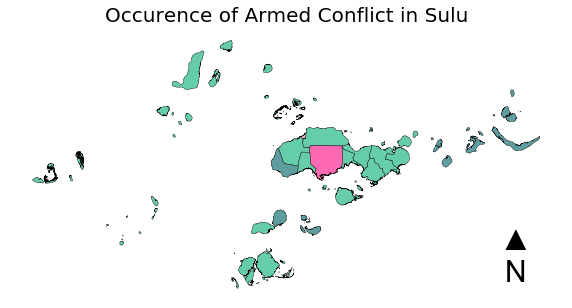

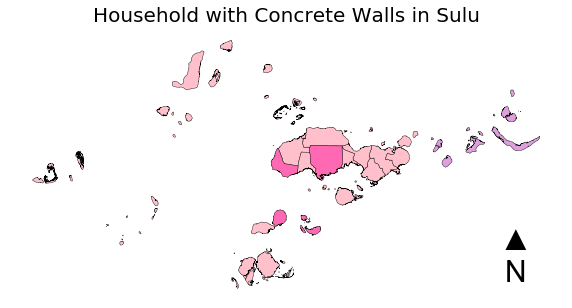

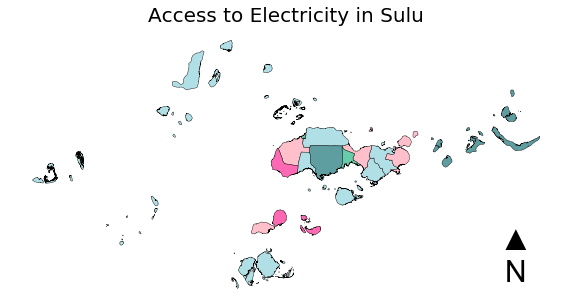

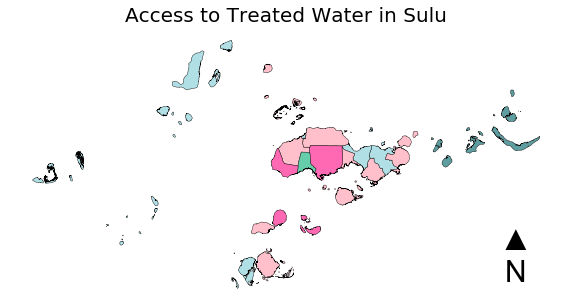

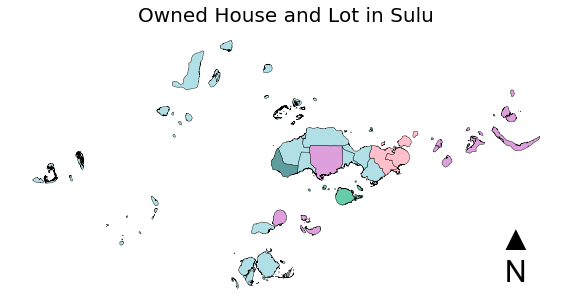

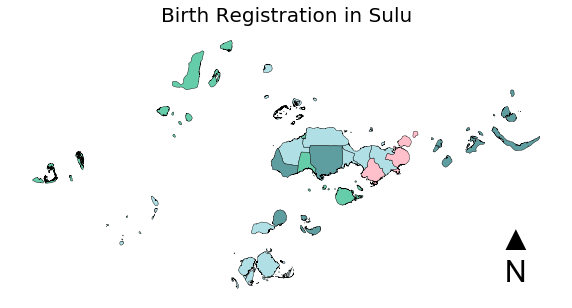

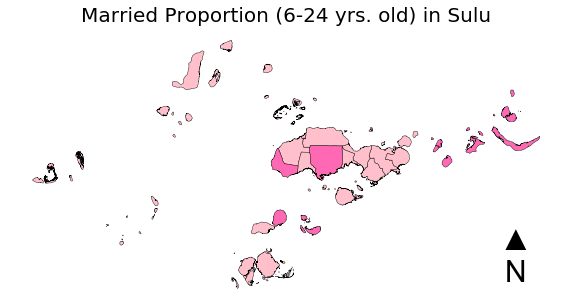

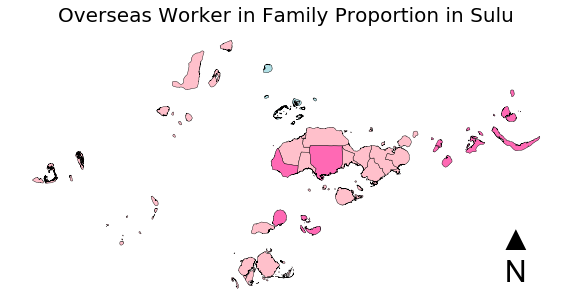

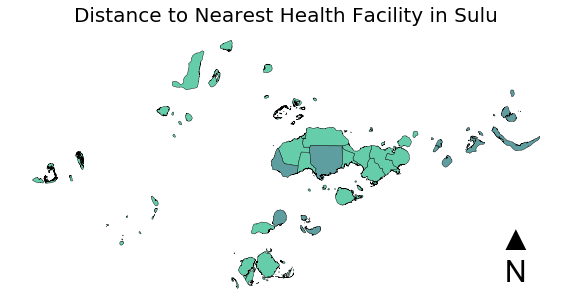

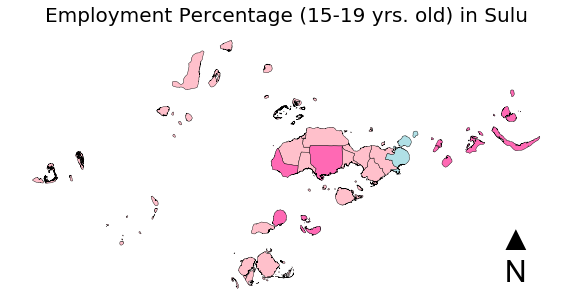

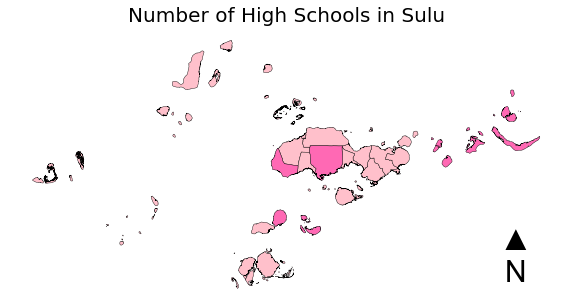

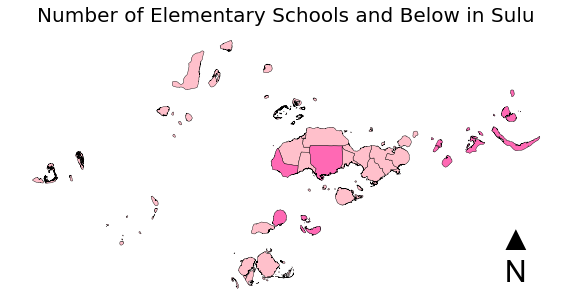

In [217]:
def plot_map(final, province, title, column, file):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(title, size=20)
    ax.set_axis_off()
    final[final['Pro_Name'] == province].plot(color=final[column], ax=ax, edgecolor='black', linewidth=0.4)
    ax.text(province_dict[province][1][0], province_dict[province][1][1], u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial')
    plt.savefig(file, dpi=500, format='png')

for column, name in feature_dict.items():
    plot_map(final_color, 'SULU', 
                 name[0] + province_dict['SULU'][0], 
                 column,
                 name[1] + 'sulu_bivariate.png')


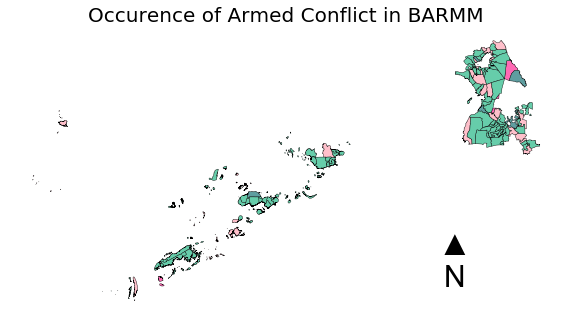

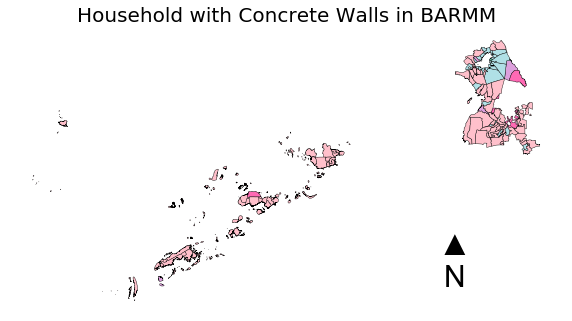

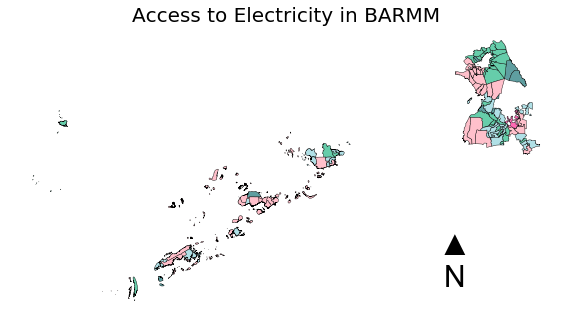

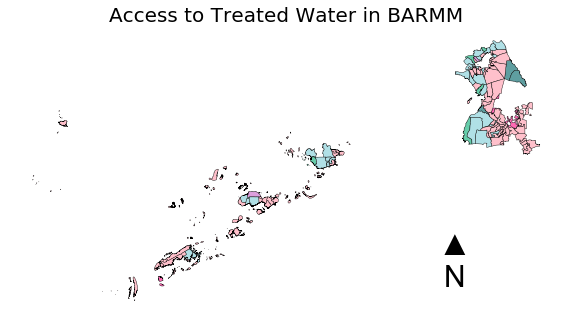

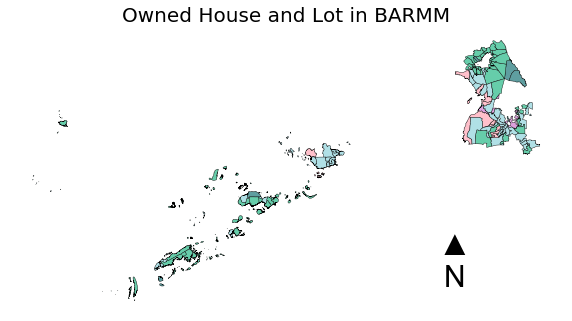

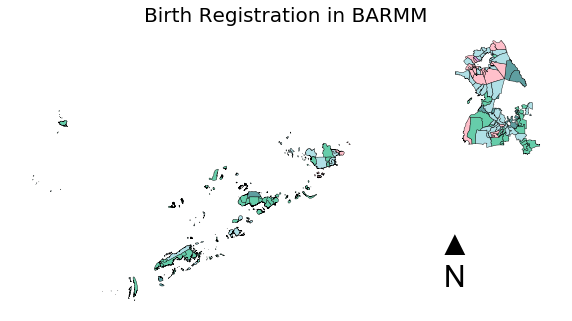

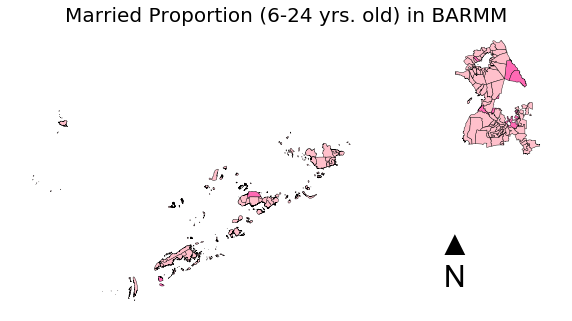

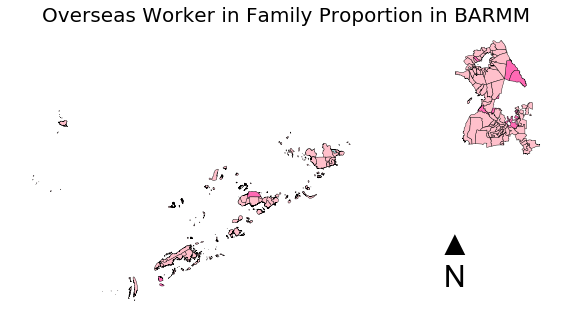

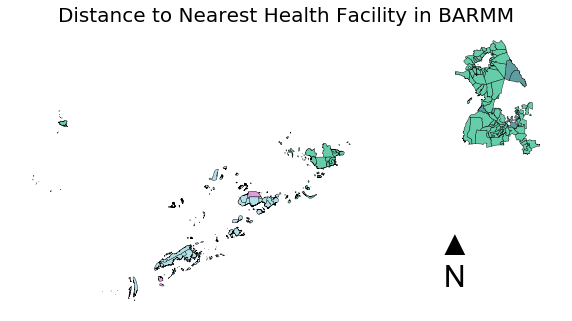

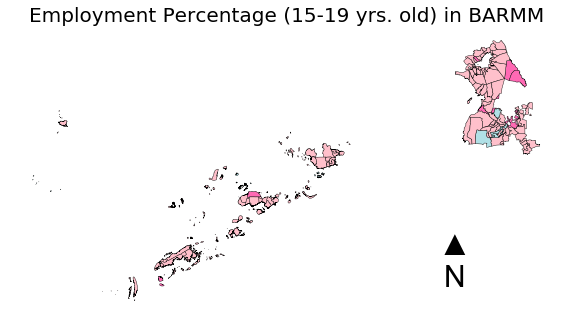

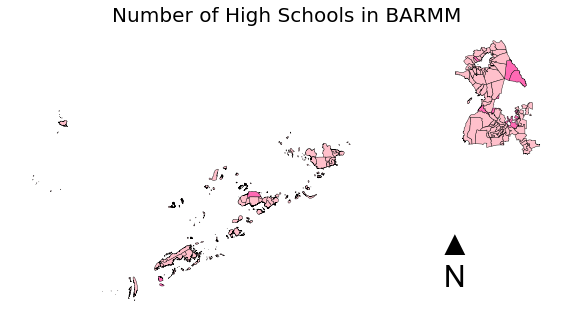

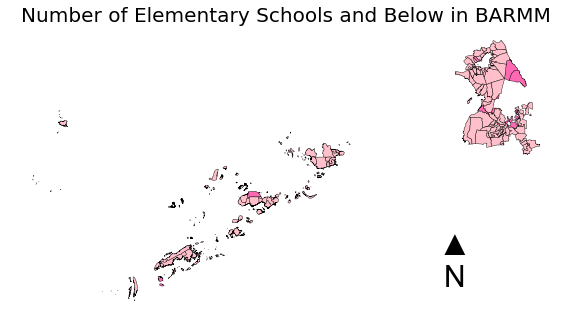

In [218]:
def plot_map(final, title, column, file):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(title, size=20)
    ax.set_axis_off()
    final.plot(color=final[column], ax=ax, edgecolor='black', linewidth=0.4)
    ax.text(600000, 530000,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial')
    plt.savefig(file, dpi=500, format='png')

    
for column, name in feature_dict.items():
    plot_map(final_color,
              name[0] + 'BARMM',
              column,
              name[1] + '_barmm_bivariate.png')

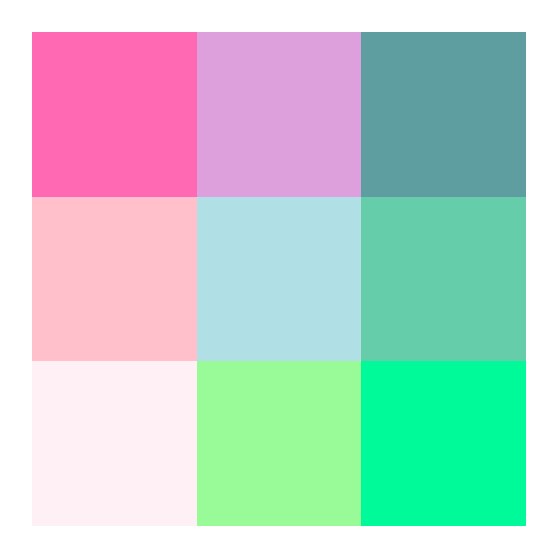

In [143]:
box11 = np.array([[1,1],[1,2],[2,2],[2,1]])
box12 = box11 + 1

df = gpd.GeoDataFrame(pd.DataFrame([[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1],[1, 1]], 
                  columns=['color','geometry']))
df['color'] = ['lavenderblush', 'powderblue', 'cadetblue', 'palegreen', 'mediumspringgreen','pink', 'hotpink','mediumaquamarine','plum']
df.iloc[0, 1] = Polygon(np.array([[1,1],[1,2],[2,2],[2,1]])) 
df.iloc[1, 1] = Polygon(np.array([[1,1],[1,2],[2,2],[2,1]]) + 1) 
df.iloc[2, 1] = Polygon(np.array([[1,1],[1,2],[2,2],[2,1]]) + 2) 
df.iloc[3, 1] = Polygon(np.array([[2,1],[2,2],[3,2],[3,1]])) 
df.iloc[4, 1] = Polygon(np.array([[3,1],[3,2],[4,2],[4,1]])) 
df.iloc[5, 1] = Polygon(np.array([[1,2],[1,3],[2,3],[2,2]])) 
df.iloc[6, 1] = Polygon(np.array([[1,3],[1,4],[2,4],[2,3]])) 
df.iloc[7, 1] = Polygon(np.array([[4,2],[3,2],[3,3],[4,3]])) 
df.iloc[8, 1] = Polygon(np.array([[2,4],[2,3],[3,3],[3,4]])) 

fig, ax = plt.subplots(figsize=(10,10))
#ax.set_title(title, size=20)
ax.set_axis_off()
df.plot(color=df['color'], ax=ax)
plt.savefig('legend_bivariate.png', dpi=500, format='png')

In [ ]:
# 680000, 730000 -- maguindanao #
# 430000, 695000 -- basilan #
# 630000, 789000 -- cotabato city #
# 705000, 769000 -- north cotabato #
# 680000, 820000 -- lanao del sur #
# 200000, 765000 -- tawi-tawi #
# 375000, 605000 -- sulu

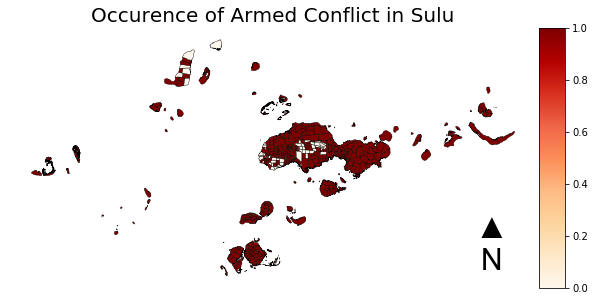

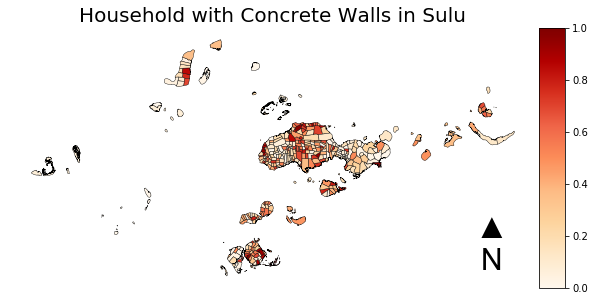

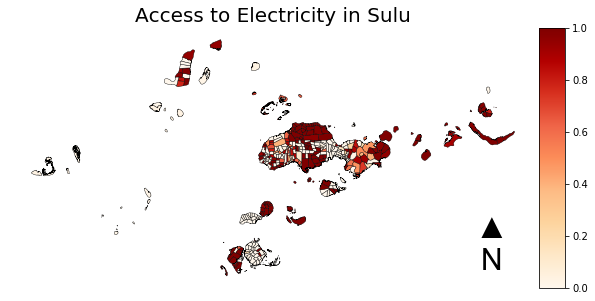

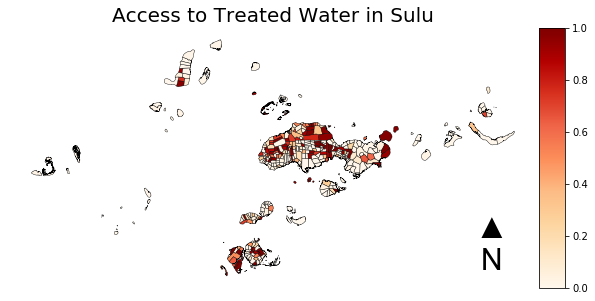

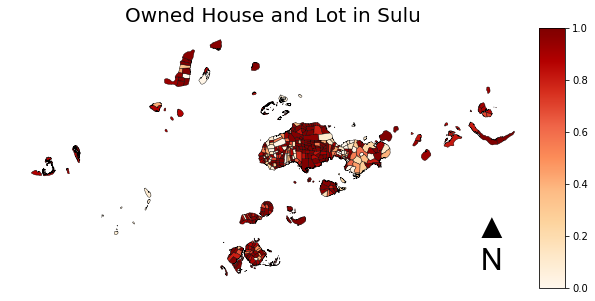

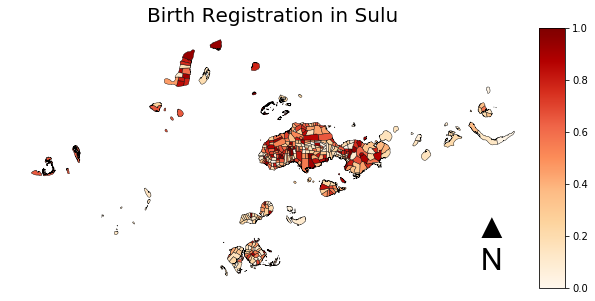

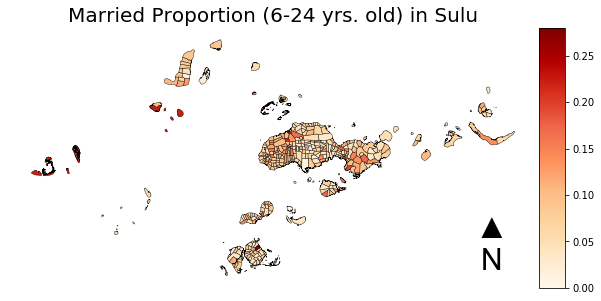

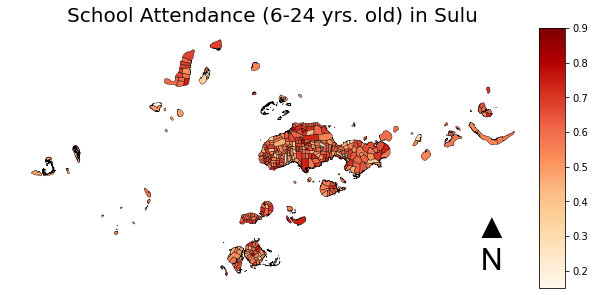

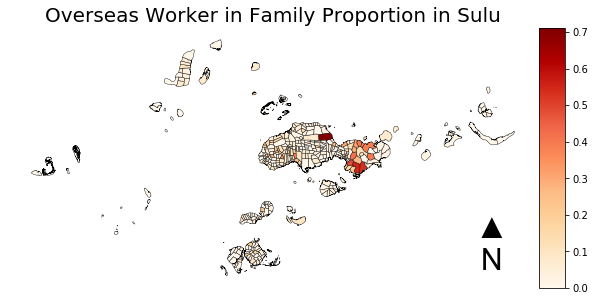

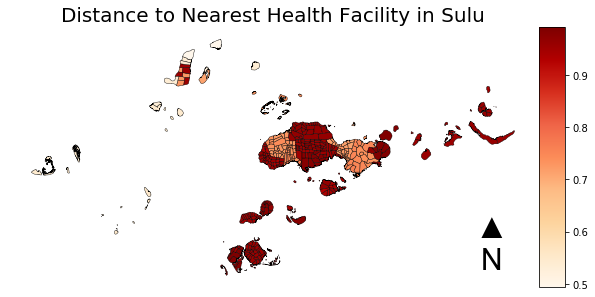

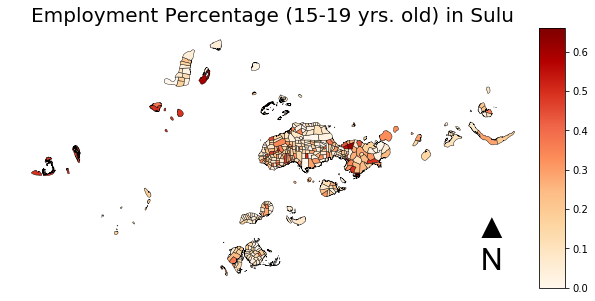

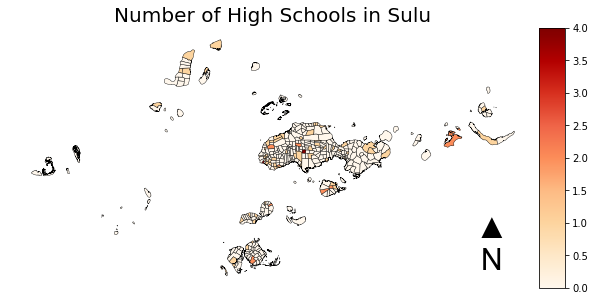

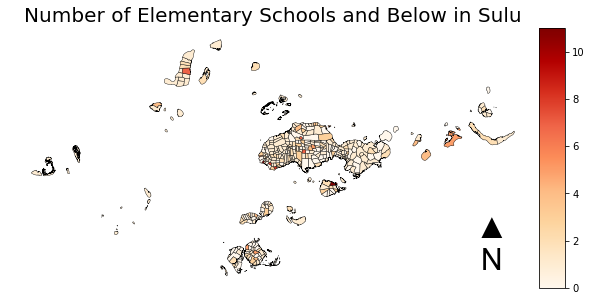

In [74]:
def plot_map(final, province, title, column, file):
    fig, ax = plt.subplots(figsize=(10,10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%")
    ax.set_title(title, size=20)
    ax.set_axis_off()
    final[final['Pro_Name'] == province].plot(column=column, cmap='OrRd', ax=ax, legend=True,cax=cax, 
                                              edgecolor='black', linewidth=0.4)
    ax.text(375000, 605000,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial')
    plt.savefig(file, dpi=500, format='png')

for column, name in feature_dict.items():
    plot_map(final,
             'SULU', 
              name[0] + 'Sulu',
              column,
              name[1] + '_sulu.png')


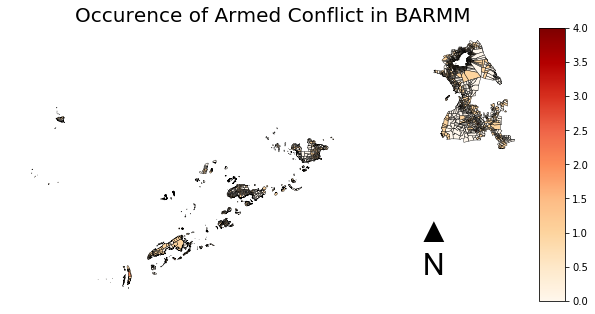

In [9]:
def plot_map(final, title, column, file):
    fig, ax = plt.subplots(figsize=(10,10))
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%")
    ax.set_title(title, size=20)
    ax.set_axis_off()
    final.plot(column=column, cmap='OrRd', ax=ax, legend=True,cax=cax, 
                                              edgecolor='black', linewidth=0.4)
    ax.text(600000, 530000,u'\u25B2 \nN ', ha='center', fontsize=30, family='Arial')
    #plt.savefig(file, dpi=500, format='png')
    
for column, name in feature_dict.items():
    plot_map(final,
              name[0] + 'BARMM',
              ['Number of', 'Occurence'],
              name[1] + '_barmm.png')
    break

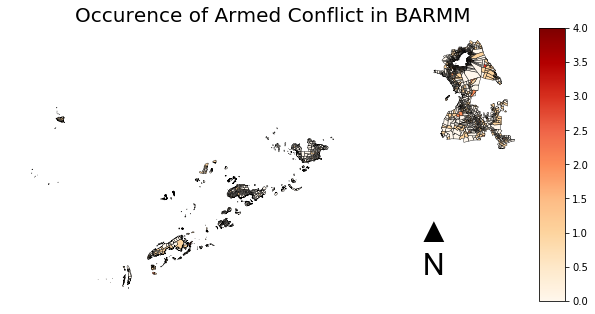

In [10]:
for column, name in feature_dict.items():
    plot_map(final,
              name[0] + 'BARMM',
              ['Number of'],
              name[1] + '_barmm.png')
    break

### Attempt Geohash 

In [3]:
# barangay.plot(figsize=(20,20))

In [4]:
# reference = gpd.read_file(os.getcwd() + '\\archive\\7 - Reference\\Reference.shp')[['NAME_1', 'NAME_3', 'REGION', 'geometry']]\
#             .rename(columns={'NAME_1':'Pro_Name', 'NAME_3':'Bgy_Name'})
# reference = reference[reference['REGION'] == 'Autonomous Region of Muslim Mindanao (ARMM)']
# reference.head()

In [5]:
# df1 = barangay[barangay['Pro_Name'] == 'LANAO DEL SUR'][['PSGC_code', 'Bgy_Name', 'area','geometry']]
# df2 = reference[reference['Pro_Name'] == 'Lanao del Sur'][['Bgy_Name', 'geometry']]

In [6]:
# df1.plot(figsize=(30,30))

In [7]:
# df2.plot(figsize=(10,10))

In [8]:
# common_bgy = list(set(df1['Bgy_Name']).intersection(df2['Bgy_Name']))[0]
# #x1, y1 = df1[df1['Bgy_Name'] == common_bgy].iloc[0, 1].exterior.coords.xy
# #x2, y2 = df2[df2['Bgy_Name'] == common_bgy].iloc[0, 1].exterior.coords.xy
# df1[df1['Bgy_Name'] == 'Ambolong'].iloc[0, 3]

In [9]:
# df2[df2['Bgy_Name'] == 'Ambolong'].iloc[0, 1]

In [10]:
# # true coordinates 157001005 is for 4.9778, 119.9939 
# c = [167780.654705735/4.9778, 551385.8742704596/119.9939] 
# print('Divide Lat and Long by: ' + str(c[0]) + ', ' + str(c[1]))
# barangay['geometry'][4]

In [19]:
# # get centroid of each shapefile, for now...
# barangay['centroid'] = barangay.apply(lambda x: x.geometry.centroid, axis=1)
# barangay.head()

,PSGC_code,Reg_Name,Pro_Name,Bgy_Name,area,geometry,centroid
0,157001001,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Balimbing Proper,1.497005e+07,"MULTIPOLYGON (((162191.469 562138.624, 162202....",POINT (163508.8472880501 564237.5866664612)
1,157001002,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Batu-batu (Pob.),8.152629e+06,"POLYGON ((154788.744 561141.297, 154788.577 56...",POINT (154348.5208267272 563590.2214992745)
2,157001003,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Buan,4.673122e+07,"MULTIPOLYGON (((174430.408 571246.155, 174433....",POINT (167445.1580363923 570867.6763768467)
3,157001004,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Dungon,5.462780e+07,"POLYGON ((182461.829 575050.555, 182461.151 57...",POINT (181102.5270247771 577459.6241759483)
4,157001005,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Luuk Buntal,6.210445e+06,"MULTIPOLYGON (((165920.073 551841.163, 165917....",POINT (167780.654705735 551385.8742704596)


In [21]:
barangay['true_centroid'] = barangay.apply(lambda x: Point(x.centroid.x*c[0], x.centroid.y*c[1]), axis=1)
barangay

,PSGC_code,Reg_Name,Pro_Name,Bgy_Name,area,geometry,centroid,true_centroid
0,157001001,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Balimbing Proper,1.497005e+07,"MULTIPOLYGON (((162191.469 562138.624, 162202....",POINT (163508.8472880501 564237.5866664612),POINT (5.388375264472574 120.0275108357461)
1,157001002,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Batu-batu (Pob.),8.152629e+06,"POLYGON ((154788.744 561141.297, 154788.577 56...",POINT (154348.5208267272 563590.2214992745),POINT (5.086500000000001 119.8898)
2,157001003,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Buan,4.673122e+07,"MULTIPOLYGON (((174430.408 571246.155, 174433....",POINT (167445.1580363923 570867.6763768467),POINT (5.518094969683868 121.4378974944174)
3,157001004,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Dungon,5.462780e+07,"POLYGON ((182461.829 575050.555, 182461.151 57...",POINT (181102.5270247771 577459.6241759483),POINT (5.968168653495876 122.8401704102645)
4,157001005,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Luuk Buntal,6.210445e+06,"MULTIPOLYGON (((165920.073 551841.163, 165917....",POINT (167780.654705735 551385.8742704596),POINT (5.529151141777202 117.293628717076)
...,...,...,...,...,...,...,...,...
2584,153818010,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),MAGUINDANAO,Togaig,2.203007e+07,"POLYGON ((647116.139 832017.938, 644563.603 83...",POINT (643995.2049306659 834336.5476004443),POINT (21.22263039732746 177.4843459107753)
2585,157005022,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,North Larap,4.289994e+06,"MULTIPOLYGON (((82476.772 523535.035, 82472.09...",POINT (101954.6922444561 527463.1595809767),POINT (3.359880219931629 112.2046662578811)
2586,157004010,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Maruwa,1.876906e+06,"MULTIPOLYGON (((147008.552 543086.465, 147007....",POINT (147615.3665986212 544414.3212864152),POINT (4.864611323660119 115.8106042410249)
2587,157003001,AUTONOMOUS REGION IN MUSLIM MINDANAO (ARMM),TAWI-TAWI,Boki,2.735266e+06,"MULTIPOLYGON (((-8638.438 762810.258, -8639.05...",POINT (-3236.085790547501 771076.7861025971),POINT (-0.1066440435285957 164.0274052742807)


In [20]:
# Batu Batu --154348.5208267272 563590.2214992745 --> 5.0865, 119.8898
c = [5.0865/154348.5208267272, 119.8898/563590.2214992745]
c

[3.295464039924388e-05, 0.00021272512443716045]

In [50]:
# convert (lat long) to geohash
barangay['geohash'] = barangay.apply(lambda x: Geohash.encode(x.true_centroid.x, x.true_centroid.y, precision=10), axis=1)
barangay['geohash_centroid_x'] = barangay.apply(lambda x: Geohash.decode_exactly(x.geohash), axis=1)
barangay['geohash_centroid_y'] = barangay.apply(lambda x: Geohash.decode(x.geohash)[1], axis=1)
barangay.head()

,Bgy_Code,geometry,PSGC_code,centroid,true_centroid,area,geohash,geohash_centroid,geohash_centroid_x,geohash_centroid_y
0,PH157001001,"MULTIPOLYGON (((162191.469 562138.624, 162202....",157001001,POINT (163508.8472880501 564237.5866664612),POINT (4.851061890644982 122.7907200928523),1.497005e+07,w8z7d5j7rp,"[4.851064682006836, 122.79058456420898]","(4.851061999797821, 122.79071867465973, 2.6822...",122.790719
1,PH157001002,"POLYGON ((154788.744 561141.297, 154788.577 56...",157001002,POINT (154348.5208267272 563590.2214992745),POINT (4.579288764362061 122.6498389517863),8.152629e+06,w8z4ncwuk3,"[4.579324722290039, 122.64982223510742]","(4.5792898535728455, 122.64983832836151, 2.682...",122.649838
2,PH157001003,"MULTIPOLYGON (((174430.408 571246.155, 174433....",157001003,POINT (167445.1580363923 570867.6763768467),POINT (4.967846317773743 124.2335759200018),4.673122e+07,wbbk7025u1,"[4.967794418334961, 124.23357009887695]","(4.967845380306244, 124.23357546329498, 2.6822...",124.233575
3,PH157001004,"POLYGON ((182461.829 575050.555, 182461.151 57...",157001004,POINT (181102.5270247771 577459.6241759483),POINT (5.373039940778829 125.6681312140727),5.462780e+07,wbcqedhspx,"[5.373086929321289, 125.66797256469727]","(5.373041331768036, 125.66812813282013, 2.6822...",125.668128
4,PH157001005,"MULTIPOLYGON (((165920.073 551841.163, 165917....",157001005,POINT (167780.654705735 551385.8742704596),POINT (4.9778 119.9939),6.210445e+06,w8vk6d0vu9,"[4.977750778198242, 119.99387741088867]","(4.977801740169525, 119.99390423297882, 2.6822...",119.993904
